#### Site:  [Kaggle E-Commerce](https://www.kaggle.com/datasets/mervemenekse/ecommerce-dataset)

##### **Columns name and meanings**:  

**Order_Date**: The date the product was ordered.  
**Aging (lead_time)**: The time from the day the product is ordered to the day it is delivered.  
**Customer_id**: Unique id created for each customer.  
**Gender**: Gender of customer.  
**Device_Type**: The device the customer uses to actualize the transaction (Web/Mobile).  
**Customer_Login_Type**: The type the customer logged in. Such as Member, Guest etc.  
**Product_Category**: Product category  
**Product**: Product  
**Sales**: Total sales amount  
**Quantity**: Unit amount of product  
**Discount**: Percent discount rate  
**Profit**: Profit  
**Shipping_cost**: Shipping cost  
**Order_Priority**: Order priority. Such as critical, high etc.  
**Payment_method**: Payment method )  

# Análise Exploratória de Dados - E-commerce 2018

#### Agora que nosso dataset está preparado limpo e padronizado, vamos iniciar a análise de dados e retirar os melhores insights para nossa empresa de e-commerce.
#### Temos os dados necessários para obtermos as inferências que a empresa necessita.
#### Abaixo temos alguns KPIs que iremos buscar além de muitos outros necessários

### Análise de Vendas e Produtos
- Avaliar o desempenho de vendas por categoria e produto
- Identificar produtos com melhor performance
- E vou expandindo conforme as idéias pararecerem nas análises

### Análise de Clientes
- Perfil demográfico dos clientes
- Comportamento de compra por tipo de login
- Análise de gastos por segmento
- E vou expandindo conforme as idéias pararecerem nas análises

### Análise Operacional
- Desempenho logístico (tempo de entrega, frete)
- Canais de aquisição de clientes
- E vou expandindo conforme as idéias pararecerem nas análises

In [89]:
#Libs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import plotly.express as px
import plotly.graph_objects as go

# importa pacotes/funções
from e_commerce.data_extraction.extractor import get_data
from e_commerce.etl.stats import matrix_correlacao, detecta_outliers_iqr
from e_commerce.visualization.basic_charts import grafico_barra, grafico_linha, grafico_area, grafico_pizza
from e_commerce.preprocessing.data_types import padroniza_tipos_dados
from e_commerce.preprocessing.utils_outliers import detect_outliers_iqr, remove_outliers
from e_commerce.visualization.relationship_charts import matriz_correlacao


In [2]:
input_path = 'e_commerce_prepared.csv'
df_analisis = get_data(source_type='csv', type_name='processed', filename_or_path=input_path)
df_analisis

,order_date,estimated_delivery_date,delivery_date,lead_time,shipping_status,customer_id,gender,device_type,customer_login_type,product_category,...,quantity,gross_revenue,discount,net_total,net_revenue,cost_difference,profit,shipping_cost,order_priority,payment_method
0,2018-01-02 10:56:33,2018-01-10,2018-01-10,8,On Time,37077,Female,Web,Member,Auto & Accessories,...,1,140.0,0.3,98.0,93.0,47.0,46.0,4.6,Medium,credit_card
1,2018-07-24 20:41:37,2018-08-01,2018-07-26,2,On Time,59173,Female,Web,Member,Auto & Accessories,...,1,211.0,0.3,147.7,136.0,24.0,112.0,11.2,Medium,credit_card
2,2018-11-08 08:38:49,2018-11-16,2018-11-16,8,On Time,41066,Female,Web,Member,Auto & Accessories,...,5,585.0,0.1,526.5,523.0,491.8,31.2,3.1,Critical,credit_card
3,2018-04-18 19:28:06,2018-04-26,2018-04-25,7,On Time,50741,Female,Web,Member,Auto & Accessories,...,1,118.0,0.3,82.6,80.0,53.8,26.2,2.6,High,credit_card
4,2018-08-13 21:18:39,2018-08-21,2018-08-22,9,Delayed,53639,Female,Web,Member,Auto & Accessories,...,1,250.0,0.3,175.0,159.0,-1.0,160.0,16.0,Critical,credit_card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51279,2018-02-28 22:59:50,2018-03-08,2018-03-06,6,On Time,78489,Female,Mobile,Member,Home & Furniture,...,4,496.0,0.3,347.2,345.0,325.8,19.2,1.9,Medium,money_order
51280,2018-02-28 13:19:25,2018-03-08,2018-03-02,2,On Time,91941,Female,Mobile,Member,Home & Furniture,...,5,350.0,0.2,280.0,279.0,265.0,14.0,1.4,Medium,credit_card
51281,2018-02-28 10:25:07,2018-03-08,2018-03-06,6,On Time,63313,Male,Web,Member,Home & Furniture,...,1,133.0,0.3,93.1,89.0,49.3,39.7,4.0,Medium,credit_card
51282,2018-02-28 10:50:08,2018-03-08,2018-03-07,7,On Time,86485,Male,Web,Member,Home & Furniture,...,1,216.0,0.2,172.8,160.0,28.3,131.7,13.2,Medium,credit_card


# Análise Exploratória (EDA)

In [3]:
# Shape
print('Amostras das transações: ')
print(f'Linhas: {df_analisis.shape[0]} \nColunas: {df_analisis.shape[1]}')

Amostras das transações: 
Linhas: 51284 
Colunas: 22


In [4]:
#informação do dataframe
df_analisis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51284 entries, 0 to 51283
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   order_date               51284 non-null  object 
 1   estimated_delivery_date  51284 non-null  object 
 2   delivery_date            51284 non-null  object 
 3   lead_time                51284 non-null  int64  
 4   shipping_status          51284 non-null  object 
 5   customer_id              51284 non-null  int64  
 6   gender                   51284 non-null  object 
 7   device_type              51284 non-null  object 
 8   customer_login_type      51284 non-null  object 
 9   product_category         51284 non-null  object 
 10  product                  51284 non-null  object 
 11  sales                    51284 non-null  float64
 12  quantity                 51284 non-null  int64  
 13  gross_revenue            51284 non-null  float64
 14  discount              

In [5]:
df_analisis = padroniza_tipos_dados(df_analisis, verbose=False)
df_analisis

H:\Portifolios_e_anotacoes_Jackson\PORTIFÓLIOS\america_ecommerce\src\e_commerce\preprocessing\data_types.py:37: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df_typed[col], errors='raise')
H:\Portifolios_e_anotacoes_Jackson\PORTIFÓLIOS\america_ecommerce\src\e_commerce\preprocessing\data_types.py:37: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df_typed[col], errors='raise')
H:\Portifolios_e_anotacoes_Jackson\PORTIFÓLIOS\america_ecommerce\src\e_commerce\preprocessing\data_types.py:37: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime

,order_date,estimated_delivery_date,delivery_date,lead_time,shipping_status,customer_id,gender,device_type,customer_login_type,product_category,...,quantity,gross_revenue,discount,net_total,net_revenue,cost_difference,profit,shipping_cost,order_priority,payment_method
0,2018-01-02 10:56:33,2018-01-10,2018-01-10,8,On Time,37077,Female,Web,Member,Auto & Accessories,...,1,140.0,0.3,98.0,93.0,47.0,46.0,4.6,Medium,credit_card
1,2018-07-24 20:41:37,2018-08-01,2018-07-26,2,On Time,59173,Female,Web,Member,Auto & Accessories,...,1,211.0,0.3,147.7,136.0,24.0,112.0,11.2,Medium,credit_card
2,2018-11-08 08:38:49,2018-11-16,2018-11-16,8,On Time,41066,Female,Web,Member,Auto & Accessories,...,5,585.0,0.1,526.5,523.0,491.8,31.2,3.1,Critical,credit_card
3,2018-04-18 19:28:06,2018-04-26,2018-04-25,7,On Time,50741,Female,Web,Member,Auto & Accessories,...,1,118.0,0.3,82.6,80.0,53.8,26.2,2.6,High,credit_card
4,2018-08-13 21:18:39,2018-08-21,2018-08-22,9,Delayed,53639,Female,Web,Member,Auto & Accessories,...,1,250.0,0.3,175.0,159.0,-1.0,160.0,16.0,Critical,credit_card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51279,2018-02-28 22:59:50,2018-03-08,2018-03-06,6,On Time,78489,Female,Mobile,Member,Home & Furniture,...,4,496.0,0.3,347.2,345.0,325.8,19.2,1.9,Medium,money_order
51280,2018-02-28 13:19:25,2018-03-08,2018-03-02,2,On Time,91941,Female,Mobile,Member,Home & Furniture,...,5,350.0,0.2,280.0,279.0,265.0,14.0,1.4,Medium,credit_card
51281,2018-02-28 10:25:07,2018-03-08,2018-03-06,6,On Time,63313,Male,Web,Member,Home & Furniture,...,1,133.0,0.3,93.1,89.0,49.3,39.7,4.0,Medium,credit_card
51282,2018-02-28 10:50:08,2018-03-08,2018-03-07,7,On Time,86485,Male,Web,Member,Home & Furniture,...,1,216.0,0.2,172.8,160.0,28.3,131.7,13.2,Medium,credit_card


In [6]:
df_analisis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51284 entries, 0 to 51283
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   order_date               51284 non-null  datetime64[ns]
 1   estimated_delivery_date  51284 non-null  datetime64[ns]
 2   delivery_date            51284 non-null  datetime64[ns]
 3   lead_time                51284 non-null  int64         
 4   shipping_status          51284 non-null  object        
 5   customer_id              51284 non-null  int64         
 6   gender                   51284 non-null  object        
 7   device_type              51284 non-null  object        
 8   customer_login_type      51284 non-null  object        
 9   product_category         51284 non-null  object        
 10  product                  51284 non-null  object        
 11  sales                    51284 non-null  float64       
 12  quantity                 51284 n

In [7]:
# Dados Nulos
df_analisis.isnull().sum()

order_date                 0
estimated_delivery_date    0
delivery_date              0
lead_time                  0
shipping_status            0
customer_id                0
gender                     0
device_type                0
customer_login_type        0
product_category           0
product                    0
sales                      0
quantity                   0
gross_revenue              0
discount                   0
net_total                  0
net_revenue                0
cost_difference            0
profit                     0
shipping_cost              0
order_priority             0
payment_method             0
dtype: int64

In [8]:
# Observa dados duplicados
df_analisis.duplicated().sum()

np.int64(0)

In [9]:
df_analisis.columns

Index(['order_date', 'estimated_delivery_date', 'delivery_date', 'lead_time',
       'shipping_status', 'customer_id', 'gender', 'device_type',
       'customer_login_type', 'product_category', 'product', 'sales',
       'quantity', 'gross_revenue', 'discount', 'net_total', 'net_revenue',
       'cost_difference', 'profit', 'shipping_cost', 'order_priority',
       'payment_method'],
      dtype='object')

#### Análise estatísticas básicas

In [10]:
# Estatística Básica do Dataframe
df_analisis[['lead_time', 'sales', 'quantity', 'discount',
            'profit', 'shipping_cost', 'gross_revenue',
            'net_total', 'net_revenue', 'cost_difference',
            ]].describe()

,lead_time,sales,quantity,discount,profit,shipping_cost,gross_revenue,net_total,net_revenue,cost_difference
count,51284.000000,51284.000000,51284.000000,51284.000000,51284.000000,51284.000000,51284.000000,51284.000000,51284.000000,51284.000000
mean,5.255226,152.338254,2.502905,0.303834,70.402570,7.041245,382.822908,264.217850,257.185165,186.782595
std,2.960011,66.491699,1.511834,0.131025,48.727814,4.871654,303.878716,216.100066,214.146431,200.068204
min,1.000000,33.000000,1.000000,0.100000,0.500000,0.100000,33.000000,17.000000,14.000000,-58.500000
25%,3.000000,85.000000,1.000000,0.200000,24.900000,2.500000,149.000000,105.500000,98.000000,34.800000
50%,5.000000,133.000000,2.000000,0.300000,59.900000,6.000000,248.000000,187.200000,181.000000,115.800000
75%,8.000000,218.000000,4.000000,0.400000,118.400000,11.800000,545.000000,372.400000,369.000000,294.400000
max,10.000000,250.000000,5.000000,0.500000,167.500000,16.800000,1250.000000,1125.000000,1109.000000,951.500000


### Análise Preliminar de Dados Numéricos
### A análise inicial dos dados numéricos revelou características importantes sobre sua distribuição.

#### Observamos que o desvio padrão de certas variáveis é consideravelmente alto, indicando uma alta variabilidade e a existência de valores que se desviam significativamente da média. No entanto, a pequena diferença entre a média e a mediana sugere que a distribuição dos dados não é marcadamente assimétrica. Isso nos permite inferir que, apesar da variabilidade, a maior parte dos valores está agrupada em torno do centro da distribuição.

In [11]:
colunas = ['lead_time', 'sales', 'quantity', 'discount',
            'profit', 'shipping_cost', 'gross_revenue',
            'net_total', 'net_revenue', 'cost_difference',
            ]
colunas

['lead_time',
 'sales',
 'quantity',
 'discount',
 'profit',
 'shipping_cost',
 'gross_revenue',
 'net_total',
 'net_revenue',
 'cost_difference']

In [12]:
# Outlier
resultado_outlier = detect_outliers_iqr(df=df_analisis, columns=colunas)

In [13]:
for chave, valor in resultado_outlier.items():
    print(chave, valor)

lead_time []
sales []
quantity []
discount []
profit []
shipping_cost []
gross_revenue [8, 17, 40, 62, 89, 111, 165, 174, 187, 192, 213, 222, 231, 249, 254, 263, 303, 320, 347, 361, 370, 383, 388, 406, 424, 451, 491, 496, 505, 509, 544, 562, 589, 594, 598, 603, 629, 651, 678, 710, 719, 728, 755, 759, 768, 777, 794, 799, 808, 835, 871, 875, 884, 898, 902, 916, 929, 938, 943, 947, 988, 1001, 1051, 1087, 1105, 1123, 1154, 1159, 1190, 1217, 1235, 1267, 1280, 1289, 1330, 1370, 1375, 1388, 1433, 1442, 1447, 1523, 1555, 1568, 1595, 1640, 1649, 1654, 1690, 1703, 1708, 1717, 1726, 1735, 1766, 1780, 1852, 1861, 1870, 1874, 1982, 2000, 2014, 2018, 2032, 2041, 2063, 2077, 2104, 2108, 2117, 2131, 2153, 2158, 2167, 2198, 2212, 2221, 2243, 2275, 2306, 2338, 2437, 2446, 2500, 2522, 2554, 2563, 2576, 2612, 2621, 2657, 2675, 2711, 2720, 2765, 2774, 2801, 2810, 2945, 2981, 3004, 3044, 3071, 3080, 3143, 3157, 3184, 3188, 3233, 3319, 3337, 3346, 3359, 3364, 3368, 3373, 3404, 3431, 3436, 3463, 3517, 3539, 3

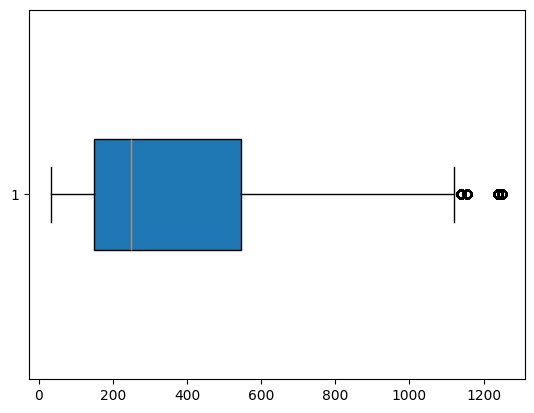

In [14]:
# Box Plot do Faturamento Bruto
plt.boxplot(df_analisis['gross_revenue'], vert=False, widths=0.30, patch_artist=True);

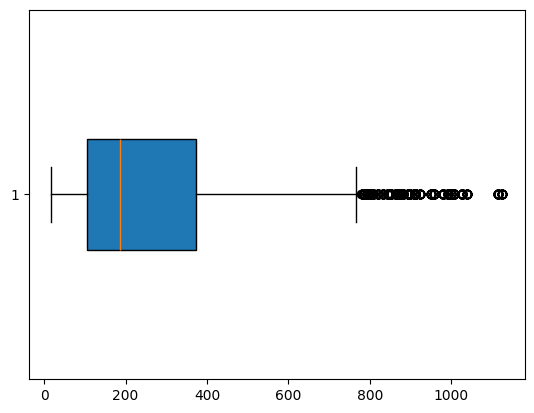

In [15]:
# Box Plot do Faturamento liquido
plt.boxplot(df_analisis['net_total'], vert=False, widths=0.30, patch_artist=True);

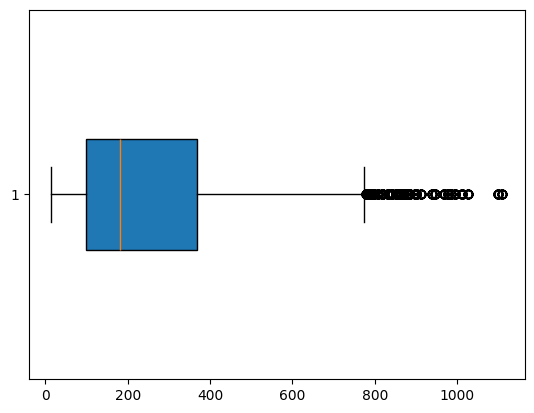

In [16]:
# Box Plot do Receita Liquida
plt.boxplot(df_analisis['net_revenue'], vert=False, widths=0.30, patch_artist=True);

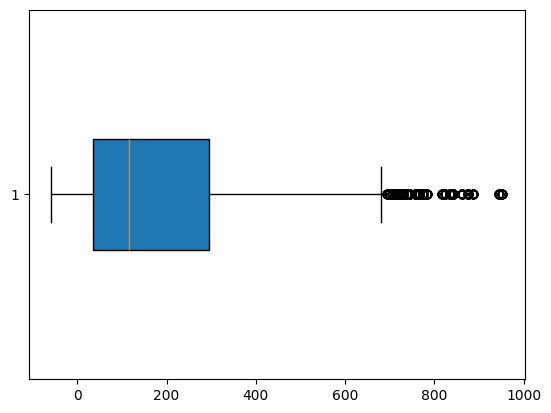

In [17]:
# Box Plot do Diferença nos custos
plt.boxplot(df_analisis['cost_difference'], vert=False, widths=0.30, patch_artist=True);

# Análise de vendas e produtos

In [18]:
df_analisis.sort_index()


,order_date,estimated_delivery_date,delivery_date,lead_time,shipping_status,customer_id,gender,device_type,customer_login_type,product_category,...,quantity,gross_revenue,discount,net_total,net_revenue,cost_difference,profit,shipping_cost,order_priority,payment_method
0,2018-01-02 10:56:33,2018-01-10,2018-01-10,8,On Time,37077,Female,Web,Member,Auto & Accessories,...,1,140.0,0.3,98.0,93.0,47.0,46.0,4.6,Medium,credit_card
1,2018-07-24 20:41:37,2018-08-01,2018-07-26,2,On Time,59173,Female,Web,Member,Auto & Accessories,...,1,211.0,0.3,147.7,136.0,24.0,112.0,11.2,Medium,credit_card
2,2018-11-08 08:38:49,2018-11-16,2018-11-16,8,On Time,41066,Female,Web,Member,Auto & Accessories,...,5,585.0,0.1,526.5,523.0,491.8,31.2,3.1,Critical,credit_card
3,2018-04-18 19:28:06,2018-04-26,2018-04-25,7,On Time,50741,Female,Web,Member,Auto & Accessories,...,1,118.0,0.3,82.6,80.0,53.8,26.2,2.6,High,credit_card
4,2018-08-13 21:18:39,2018-08-21,2018-08-22,9,Delayed,53639,Female,Web,Member,Auto & Accessories,...,1,250.0,0.3,175.0,159.0,-1.0,160.0,16.0,Critical,credit_card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51279,2018-02-28 22:59:50,2018-03-08,2018-03-06,6,On Time,78489,Female,Mobile,Member,Home & Furniture,...,4,496.0,0.3,347.2,345.0,325.8,19.2,1.9,Medium,money_order
51280,2018-02-28 13:19:25,2018-03-08,2018-03-02,2,On Time,91941,Female,Mobile,Member,Home & Furniture,...,5,350.0,0.2,280.0,279.0,265.0,14.0,1.4,Medium,credit_card
51281,2018-02-28 10:25:07,2018-03-08,2018-03-06,6,On Time,63313,Male,Web,Member,Home & Furniture,...,1,133.0,0.3,93.1,89.0,49.3,39.7,4.0,Medium,credit_card
51282,2018-02-28 10:50:08,2018-03-08,2018-03-07,7,On Time,86485,Male,Web,Member,Home & Furniture,...,1,216.0,0.2,172.8,160.0,28.3,131.7,13.2,Medium,credit_card


In [19]:
# Receita total
valor = df_analisis["gross_revenue"].sum()
valor_formatado = "{:,.2f}".format(valor).replace(",", "X").replace(".", ",").replace("X", ".")
print(f"Receita Total: R$ {valor_formatado}")

Receita Total: R$ 19.632.690,00


In [20]:
# Ticket Médio das vendas
print(f'Ticket Médio das Vendas: $ {round(df_analisis["sales"].mean(), 2)}')

Ticket Médio das Vendas: $ 152.34


In [21]:
# Taxa de desconto médio da vendas
print(f'Taxa média de desconto: {round(df_analisis["discount"].mean() * 10)}%')

Taxa média de desconto: 3%


In [22]:
# Volume de vendas no periodo do ano
print(f'Volume vendido: {df_analisis["quantity"].sum()} produtos')

Volume vendido: 128359 produtos


In [23]:
df_analisis

,order_date,estimated_delivery_date,delivery_date,lead_time,shipping_status,customer_id,gender,device_type,customer_login_type,product_category,...,quantity,gross_revenue,discount,net_total,net_revenue,cost_difference,profit,shipping_cost,order_priority,payment_method
0,2018-01-02 10:56:33,2018-01-10,2018-01-10,8,On Time,37077,Female,Web,Member,Auto & Accessories,...,1,140.0,0.3,98.0,93.0,47.0,46.0,4.6,Medium,credit_card
1,2018-07-24 20:41:37,2018-08-01,2018-07-26,2,On Time,59173,Female,Web,Member,Auto & Accessories,...,1,211.0,0.3,147.7,136.0,24.0,112.0,11.2,Medium,credit_card
2,2018-11-08 08:38:49,2018-11-16,2018-11-16,8,On Time,41066,Female,Web,Member,Auto & Accessories,...,5,585.0,0.1,526.5,523.0,491.8,31.2,3.1,Critical,credit_card
3,2018-04-18 19:28:06,2018-04-26,2018-04-25,7,On Time,50741,Female,Web,Member,Auto & Accessories,...,1,118.0,0.3,82.6,80.0,53.8,26.2,2.6,High,credit_card
4,2018-08-13 21:18:39,2018-08-21,2018-08-22,9,Delayed,53639,Female,Web,Member,Auto & Accessories,...,1,250.0,0.3,175.0,159.0,-1.0,160.0,16.0,Critical,credit_card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51279,2018-02-28 22:59:50,2018-03-08,2018-03-06,6,On Time,78489,Female,Mobile,Member,Home & Furniture,...,4,496.0,0.3,347.2,345.0,325.8,19.2,1.9,Medium,money_order
51280,2018-02-28 13:19:25,2018-03-08,2018-03-02,2,On Time,91941,Female,Mobile,Member,Home & Furniture,...,5,350.0,0.2,280.0,279.0,265.0,14.0,1.4,Medium,credit_card
51281,2018-02-28 10:25:07,2018-03-08,2018-03-06,6,On Time,63313,Male,Web,Member,Home & Furniture,...,1,133.0,0.3,93.1,89.0,49.3,39.7,4.0,Medium,credit_card
51282,2018-02-28 10:50:08,2018-03-08,2018-03-07,7,On Time,86485,Male,Web,Member,Home & Furniture,...,1,216.0,0.2,172.8,160.0,28.3,131.7,13.2,Medium,credit_card


In [ ]:
# Total de Vendas por mês no ano
venda_ano_por_mes = df_analisis.groupby(df_analisis['order_date'].dt.to_period('M'))['sales'].sum()
venda_ano_por_mes = venda_ano_por_mes.reset_index('order_date')
venda_ano_por_mes['order_date'] = venda_ano_por_mes['order_date'].dt.to_timestamp()
venda_ano_por_mes

,order_date,sales
0,2018-01-01,379627.0
1,2018-02-01,332495.0
2,2018-03-01,435502.0
3,2018-04-01,596990.0
4,2018-05-01,824713.0
5,2018-06-01,642501.0
6,2018-07-01,809974.0
7,2018-08-01,664245.0
8,2018-09-01,738303.0
9,2018-10-01,743137.0


In [84]:
fig = px.line(
    venda_ano_por_mes,
    x='order_date',
    y='sales',
    markers=True,  # bolinhas nos pontos
    title="Evolução de Venda no Ano",
)

# Melhorias visuais
fig.update_layout(
    title={'x': 0.5, 'xanchor': 'center'},  # centraliza título
    xaxis_title="Data do Pedido",
    template="plotly_white",
    hovermode="x unified",  # hover elegante unido
    font=dict(size=14)
)

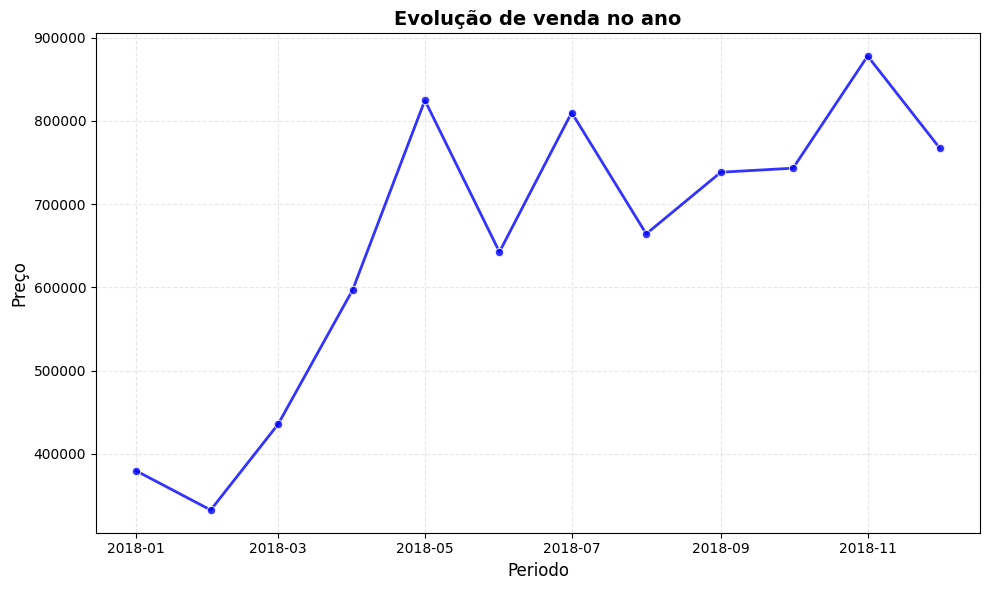

In [25]:
# Evolução de venda no ano 
grafico_linha(df=venda_ano_por_mes,
                x='order_date',
                y='sales',
                marker="o",
                titulo="Evolução de venda no ano",
                xlabel="Periodo",
                ylabel="Preço")

In [26]:
# Tabela de vendas por dia no mês
venda_por_mes = df_analisis.groupby(df_analisis['order_date'].dt.to_period('D'))['sales'].sum()
venda_por_mes = venda_por_mes.reset_index('order_date')
venda_por_mes['order_date'] = venda_por_mes['order_date'].dt.to_timestamp()
venda_por_mes

,order_date,sales
0,2018-01-01,11988.0
1,2018-01-02,11177.0
2,2018-01-03,15927.0
3,2018-01-04,14778.0
4,2018-01-05,13435.0
...,...,...
351,2018-12-26,24769.0
352,2018-12-27,26553.0
353,2018-12-28,26159.0
354,2018-12-29,21165.0


In [ ]:
# Modelo para pegar o primeiro e o último periodo de tempo
venda_por_mes.query('order_date <= "2018-01-31"')
venda_por_mes.query('order_date >= "2018-12-31"')

# Modelo para escolher o mês de análise:
venda_por_mes.query('order_date >= "2018-01-31" and order_date <= "2018-02-29"')

In [88]:
fig2 = px.line(venda_por_mes,
        x='order_date',
        y='sales',
        markers=True,
        title='Vendas diárias por mês')

fig2.update_layout(
        title={'x': 0.5, 'xanchor': 'center'},
        xaxis_title='Data do Pedido',
        yaxis_title="Vendas (R$)",
        template='plotly_white',
        hovermode='x unified',
        font=dict(size=14)
)

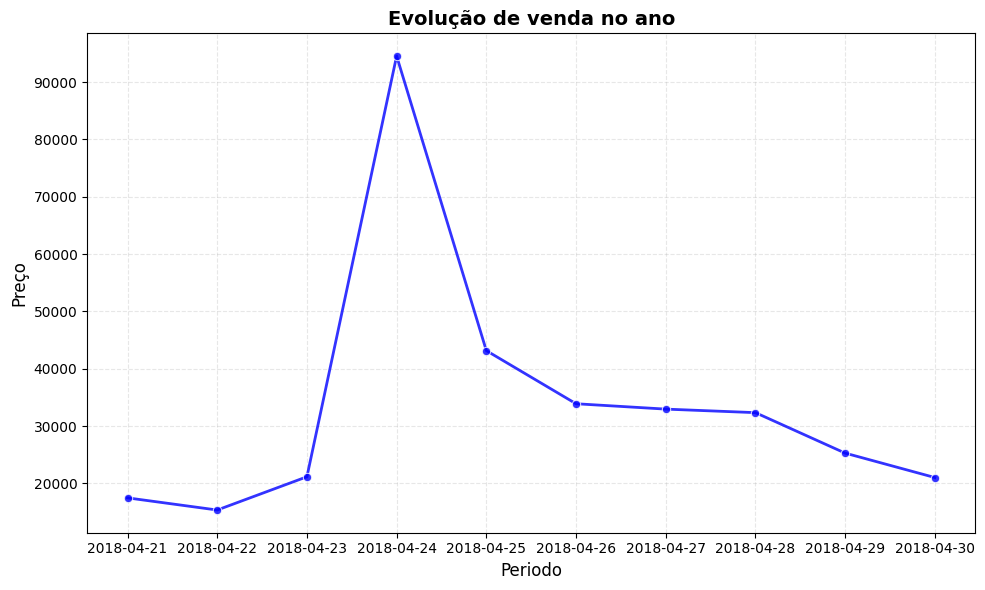

In [83]:
grafico_linha(df=venda_por_mes.query('order_date >= "2018-04-21" and order_date <= "2018-04-30"'),
                x='order_date',
                y='sales',
                marker="o",
                titulo="Evolução de venda no ano",
                xlabel="Periodo",
                ylabel="Preço")

In [92]:
df = df_analisis.copy()
df['mes'] = df['order_date'].dt.to_period('M').astype(str)
df['dia'] = df['order_date'].dt.to_period('D').astype(str)

# ---- Nível 1: vendas por MÊS
venda_por_mes = df.groupby('mes')['sales'].sum().reset_index()

# ---- Nível 2: vendas por DIA para cada mês
venda_por_dia = df.groupby('dia')['sales'].sum().reset_index()
venda_por_dia['mes'] = venda_por_dia['dia'].str.slice(0, 7)  # extrai YYYY-MM


# ============================
#     GRÁFICO BASE (MÊS)
# ============================
fig = px.line(
    venda_por_mes,
    x='mes',
    y='sales',
    markers=True,
    title='Vendas por Mês'
)

# ================================
#   ADICIONA TRAÇOS DOS DIAS (OCULTOS)
# ================================
meses = venda_por_mes['mes'].unique()

for m in meses:
    dados_mes = venda_por_dia[venda_por_dia['mes'] == m]
    fig.add_trace(
        go.Scatter(
            x=dados_mes['dia'],
            y=dados_mes['sales'],
            mode='lines+markers',
            name=f'Dias de {m}',
            visible=False
        )
    )


# =================================
#   BOTÕES DO DROPDOWN
# =================================
buttons = []

# Botão MÊS
buttons.append(dict(
    label="Meses",
    method="update",
    args=[
        {"visible": [True] + [False]*len(meses)}, 
        {"title": "Vendas por Mês"}
    ]
))

# Botões dos meses → mostram DIAS
for i, m in enumerate(meses):
    visible = [False] * (1 + len(meses))
    visible[i+1] = True   # ativa dias do mês i

    buttons.append(dict(
        label=m,
        method="update",
        args=[
            {"visible": visible},
            {"title": f"Vendas Diárias – {m}"}
        ]
    ))

fig.update_layout(
    updatemenus=[dict(
        buttons=buttons,
        direction="down",
        x=1.15,
        y=1
    )],
    xaxis_title="Período",
    yaxis_title="Vendas (R$)",
    template="plotly_white"
)

fig.show()

In [29]:
# Top 10 produtos por receita bruta
top10_rgr = pd.DataFrame(df_analisis.groupby('product')['gross_revenue'].sum().sort_values(ascending=False).reset_index().head(10))
top10_rgr

,product,gross_revenue
0,T - Shirts,1484528.0
1,Titak watch,1425912.0
2,Running Shoes,1358336.0
3,Formal Shoes,1310802.0
4,Jeans,1296228.0
5,Shirts,1178352.0
6,Fossil Watch,961950.0
7,Towels,862068.0
8,Sofa Covers,832032.0
9,Bed Sheets,805809.0


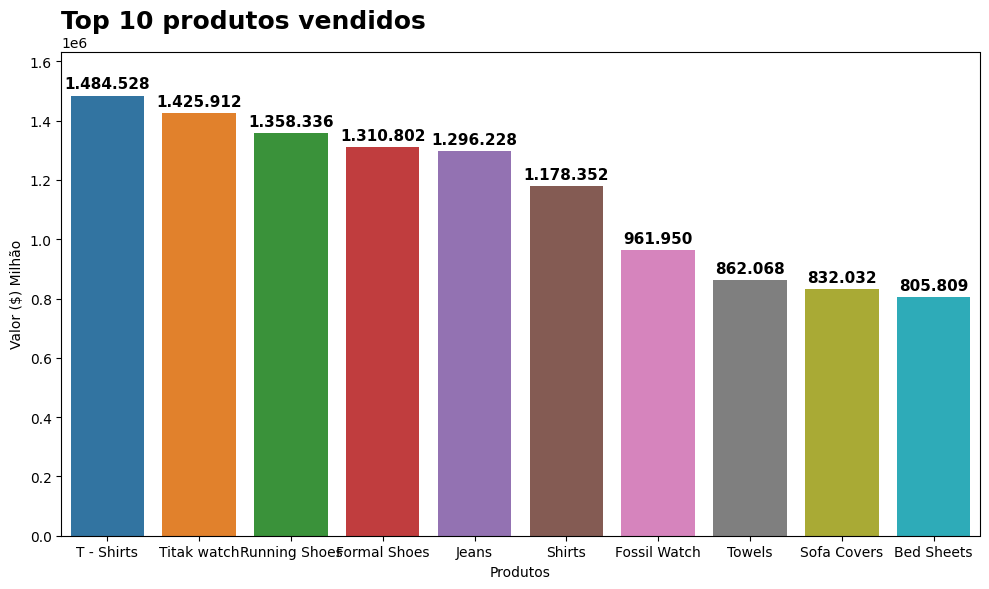

In [30]:
# Top 10 produto vendidos
grafico_barra(top10_rgr,
            x= top10_rgr['product'],
            y= 'gross_revenue',
            hue= 'product',
            titulo='Top 10 produtos vendidos',
            xlabel='Produtos',
            ylabel='Valor ($) Milhão',
            brazilian_style=True)


In [31]:
# categorias por lucro top five
top_cat_prof = pd.DataFrame(df_analisis.groupby('product_category')['profit'].sum().sort_values(ascending=False).head(5))
top_cat_prof

,profit
product_category,
Fashion,2072623.9
Home & Furniture,880058.9
Auto & Accessories,483652.0
Electronic,174190.6


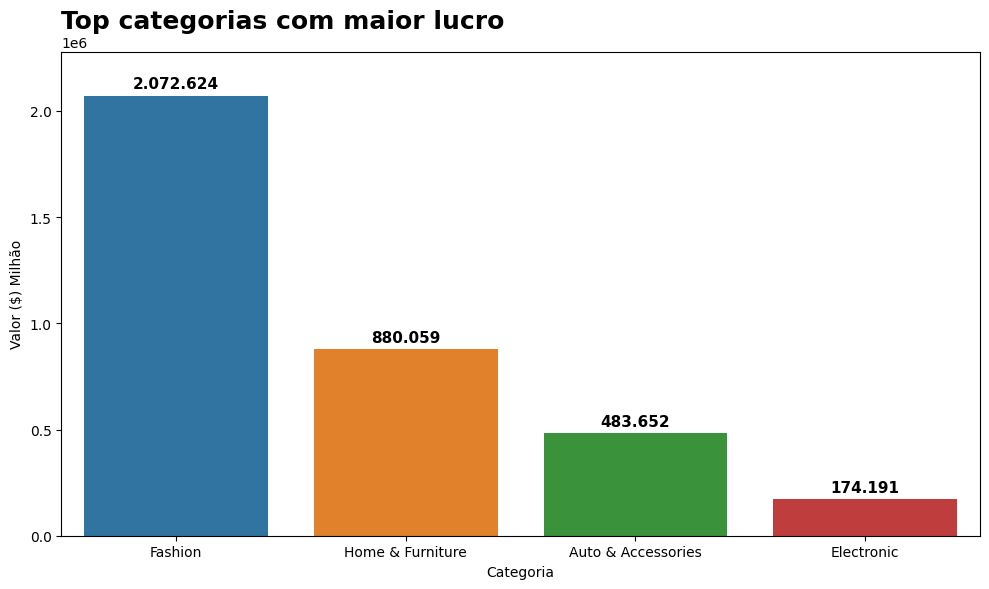

In [32]:
# Top 5 Categorias com maior lucro
grafico_barra(top_cat_prof, x= top_cat_prof.index, y= 'profit',
                hue=top_cat_prof.index,
                titulo='Top categorias com maior lucro',
                xlabel='Categoria',
                ylabel='Valor ($) Milhão',
                brazilian_style=True)

In [33]:
# Cria coluna de margem de lucro
df_analisis.insert(19, 'profit_margin', round(df_analisis['profit'] / df_analisis['sales'], 2))

In [34]:
# Margem de lucro 
profit_margin = round(df_analisis.groupby('product')['profit_margin'].mean().sort_values(ascending=False) * 100, 2).head(5)
profit_margin =  pd.DataFrame(profit_margin)
profit_margin

,profit_margin
product,
Apple Laptop,59.77
Tyre,59.27
T - Shirts,59.17
Towels,56.11
Car Pillow & Neck Rest,55.95


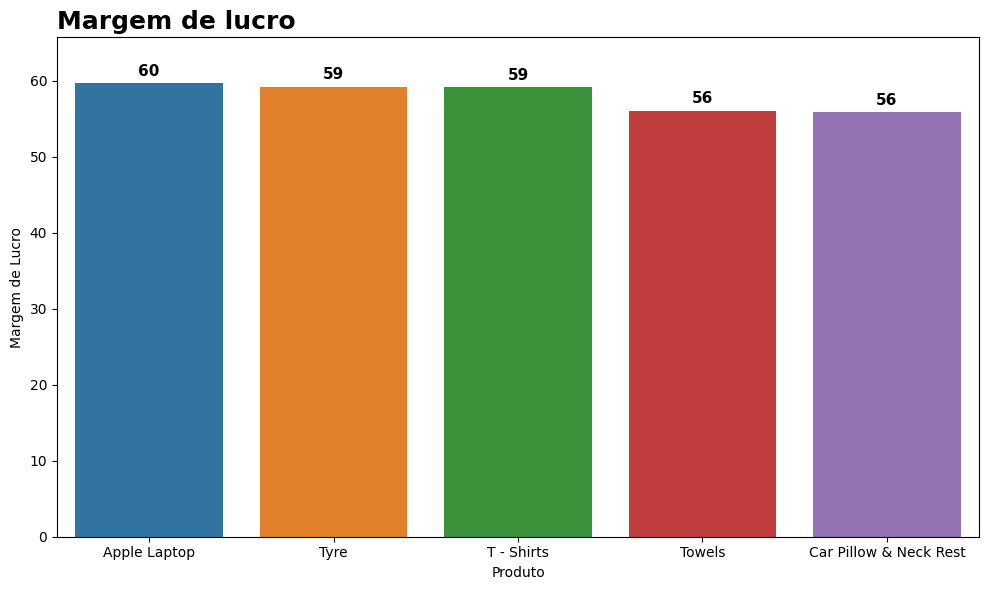

In [35]:
# Top 5 Categorias com maior lucro
grafico_barra(profit_margin, x= 'product', y= 'profit_margin',
                hue='product',
                titulo='Margem de lucro',
                xlabel='Produto',
                ylabel='Margem de Lucro',
                brazilian_style=True)

In [36]:
# Correlação entre desconto e quantidade
print("Corr(desconto, quantidade):", round(df_analisis["discount"].corr(df_analisis["quantity"]), 2))

# Correlação entre desconto e receita bruta
print("Corr(desconto, total receita bruta):", round(df_analisis["discount"].corr(df_analisis["gross_revenue"]), 2))

Corr(desconto, quantidade): 0.02
Corr(desconto, total receita bruta): 0.06


In [37]:
# Forma de pagamento quantidade
metodo_pagamento = df_analisis['payment_method'].value_counts()
metodo_pagamento = metodo_pagamento.drop('not_defined', axis=0).reset_index()
metodo_pagamento

,payment_method,count
0,credit_card,38133
1,money_order,9628
2,e_wallet,2789
3,debit_card,733


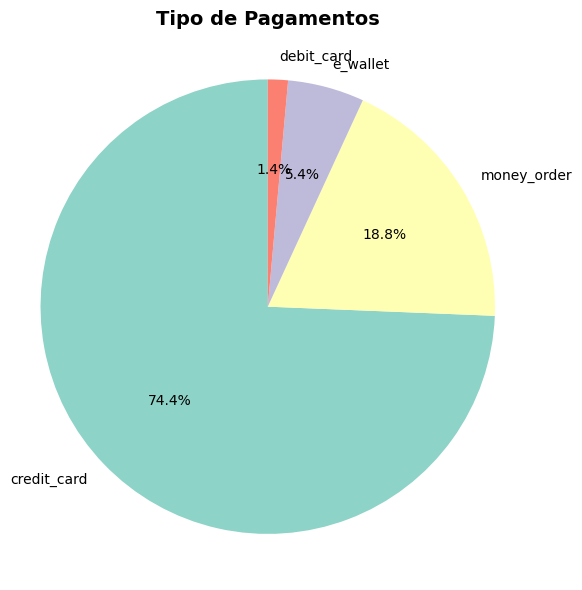

In [38]:
# Grafico pizza
grafico_pizza(metodo_pagamento, values='count', labels='payment_method', titulo="Tipo de Pagamentos",figsize=(6,6))

In [39]:
# Obter distribuição por Gênero
df_analisis['gender'].value_counts()

gender
Male      28133
Female    23151
Name: count, dtype: int64

In [40]:
# Taxa de entregar no prazo e atrasadas
display(df_analisis['shipping_status'].value_counts().reset_index())

df_status_proportion = df_analisis['shipping_status'].value_counts(normalize=True).reset_index()
df_status_proportion['proportion'] = round(df_status_proportion['proportion'] * 100, 2)
display(df_status_proportion)

,shipping_status,count
0,On Time,41719
1,Delayed,9565


,shipping_status,proportion
0,On Time,81.35
1,Delayed,18.65


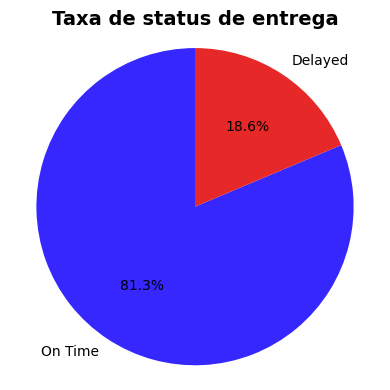

In [41]:
grafico_pizza(df=df_status_proportion,
                values='proportion',
                labels='shipping_status',
                titulo='Taxa de status de entrega',
                figsize=(4, 4),
                colors=["#3627ff", "#e72828"])

In [42]:
# Taxa de entregar no prazo e atrasadas
display(df_analisis['device_type'].value_counts().reset_index())

df_device_type_proportion = df_analisis['device_type'].value_counts(normalize=True).reset_index()
df_device_type_proportion['proportion'] = round(df_device_type_proportion['proportion'] * 100, 2)
display(df_device_type_proportion)

,device_type,count
0,Web,47626
1,Mobile,3658


,device_type,proportion
0,Web,92.87
1,Mobile,7.13


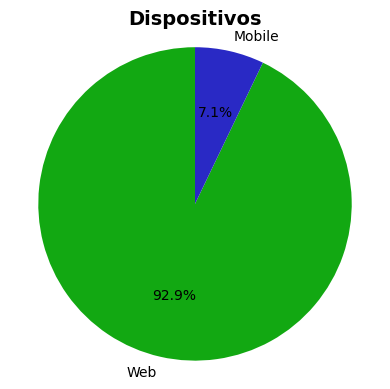

In [43]:
grafico_pizza(df=df_device_type_proportion,
                values='proportion',
                labels='device_type',
                titulo='Dispositivos',
                figsize=(4, 4),
                colors=["#12A812", "#2929c5"])

In [44]:
# Taxa de entregar no prazo e atrasadas
display(df_analisis['customer_login_type'].value_counts().reset_index())

df_cost_login_type_proportion = df_analisis['customer_login_type'].value_counts(normalize=True).reset_index()
df_cost_login_type_proportion['proportion'] = round(df_cost_login_type_proportion['proportion'] * 100, 2)
display(df_cost_login_type_proportion)

,customer_login_type,count
0,Member,49091
1,Guest,1993
2,First SignUp,173
3,New,27


,customer_login_type,proportion
0,Member,95.72
1,Guest,3.89
2,First SignUp,0.34
3,New,0.05


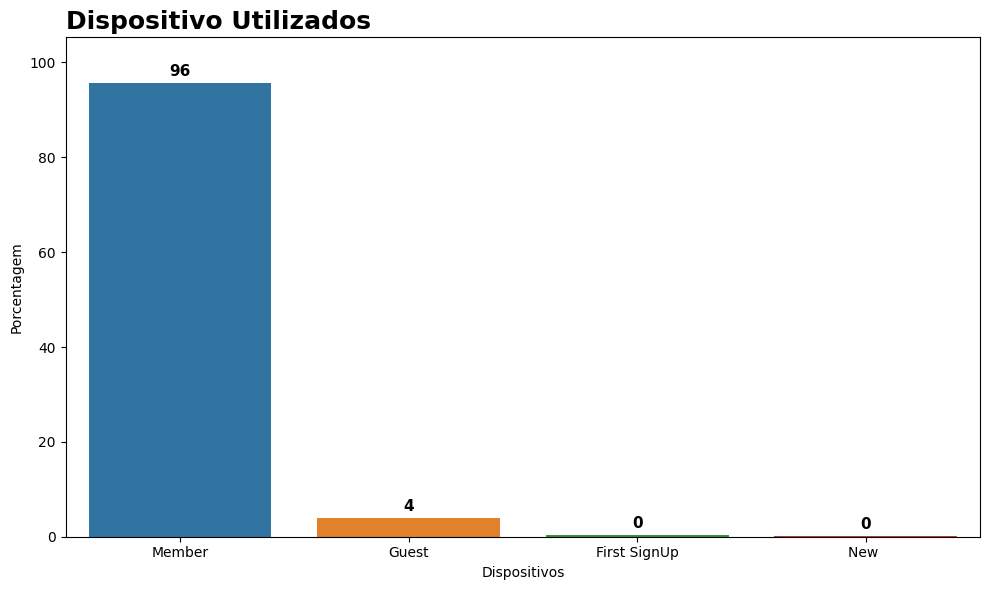

In [45]:
# Top 5 Categorias com maior lucro
grafico_barra(df_cost_login_type_proportion, x= 'customer_login_type', y= 'proportion',
                hue='customer_login_type',
                titulo='Dispositivo Utilizados',
                xlabel='Dispositivos',
                ylabel='Porcentagem',
                brazilian_style=True)

In [46]:
df_analisis


,order_date,estimated_delivery_date,delivery_date,lead_time,shipping_status,customer_id,gender,device_type,customer_login_type,product_category,...,gross_revenue,discount,net_total,net_revenue,cost_difference,profit,profit_margin,shipping_cost,order_priority,payment_method
0,2018-01-02 10:56:33,2018-01-10,2018-01-10,8,On Time,37077,Female,Web,Member,Auto & Accessories,...,140.0,0.3,98.0,93.0,47.0,46.0,0.33,4.6,Medium,credit_card
1,2018-07-24 20:41:37,2018-08-01,2018-07-26,2,On Time,59173,Female,Web,Member,Auto & Accessories,...,211.0,0.3,147.7,136.0,24.0,112.0,0.53,11.2,Medium,credit_card
2,2018-11-08 08:38:49,2018-11-16,2018-11-16,8,On Time,41066,Female,Web,Member,Auto & Accessories,...,585.0,0.1,526.5,523.0,491.8,31.2,0.27,3.1,Critical,credit_card
3,2018-04-18 19:28:06,2018-04-26,2018-04-25,7,On Time,50741,Female,Web,Member,Auto & Accessories,...,118.0,0.3,82.6,80.0,53.8,26.2,0.22,2.6,High,credit_card
4,2018-08-13 21:18:39,2018-08-21,2018-08-22,9,Delayed,53639,Female,Web,Member,Auto & Accessories,...,250.0,0.3,175.0,159.0,-1.0,160.0,0.64,16.0,Critical,credit_card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51279,2018-02-28 22:59:50,2018-03-08,2018-03-06,6,On Time,78489,Female,Mobile,Member,Home & Furniture,...,496.0,0.3,347.2,345.0,325.8,19.2,0.15,1.9,Medium,money_order
51280,2018-02-28 13:19:25,2018-03-08,2018-03-02,2,On Time,91941,Female,Mobile,Member,Home & Furniture,...,350.0,0.2,280.0,279.0,265.0,14.0,0.20,1.4,Medium,credit_card
51281,2018-02-28 10:25:07,2018-03-08,2018-03-06,6,On Time,63313,Male,Web,Member,Home & Furniture,...,133.0,0.3,93.1,89.0,49.3,39.7,0.30,4.0,Medium,credit_card
51282,2018-02-28 10:50:08,2018-03-08,2018-03-07,7,On Time,86485,Male,Web,Member,Home & Furniture,...,216.0,0.2,172.8,160.0,28.3,131.7,0.61,13.2,Medium,credit_card


In [47]:
df_customer_buys = df_analisis.groupby('customer_id')['sales'].count().rename('quantidade').sort_values(ascending=False)
df_customer_buys = pd.DataFrame(df_customer_buys)
df_customer_buys

,quantidade
customer_id,
95831,6
83036,5
92705,5
87989,5
87539,5
...,...
99974,1
99971,1
99966,1


In [48]:
df_customer_buys.groupby('quantidade')['quantidade'].sum().sort_index(ascending=False)

quantidade
6        6
5      160
4      864
3     4785
2    16644
1    28825
Name: quantidade, dtype: int64